# COMPSS 212: Final Group Project
## Why do you waste so much time on social media?

#### by Alex Liu, Shaily Bajracharya, and Srishti Gojamgunde

### Background (I'm writing this at 3 am so it doesn't sound very smart, we can fix it later...)

In recent years, social media usage has been found to predict individual and societal outcomes such as social anxiety, depressive symptoms, dissociative symptoms, low self-esteem, health risk behaviors, addictive behavior, insomnia, political polarization, misinformation, cultural homogenization, environmental impacts, etc.(Arguedas et al., 2022, Baughan et al., 2022; Cunningham et al., 2021; González-Bueso et al., 2018; McCabe et al., 2024; Moon and Lewis., 2024, Purba et al., 2023; Valkenburg et al., 2021; Walkley, 2023). 

The list of negative consequences of social media seems to be endless, but there is a surprising dearth of research on the factors that actually predict social media usage. 

### Potential factors predicting social media usage:
Through our research we have identified the following relationships as having some support from academic literature:
* Age and gender affect the social media platform of choice: younger adults are more active on platforms like Instagram, Snapchat, and TikTok, and women tend to use platforms such as Instagram, Facebook, and TikTok more than men who are more active on platforms like Reddit and X (formerly Twitter) (Pew Research Center, 2024; Vaid and Harari, 2020).
*  Age also impacts a person's financial stability, and financial stability (specifically, high household income) has been associated with increased social media usage (Hruska and Maresova, 2020).
*  Gender impacts profession (MacDonald et al., 2023) and profession at least partly determines financial situation which, in turn, is associated with increased social media usage.
*  Rural populations use social media, and the internet in general, less than urban populations (Hale et al., 2010). People living in rural areas are also more likely to own property, but the median income levels are lower than in comparable urban locations (Copeland, 2022).
*  Self-reported levels of productivity, lower measures of restraint and self-control, and greater addiction level all predict significant increases in social media usage and there is also evidence for social media to exacerbate all of them(Li et al., 2021; Peng and Liao, 2023).
*  One might expect to see some differences in social media usage based on device type (phones provide ease of accessibility while travelling or lying in bed whereas computers do not), OS, and connection type (we can intuit reduced usage when users are using their personal mobile network vs public WiFi). 
* Self-Reported measures like reason for consuming content on social media may affect usage especially because social media becomes a tool for procrastination (Alblwi et al., 2021).

### Loading required libraries:

In [1]:
install.packages("ggdag", lib = "/srv/r")
install.packages("GGally", lib = "/srv/r")

also installing the dependencies ‘V8’, ‘dagitty’


also installing the dependencies ‘patchwork’, ‘ggstats’




In [3]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(ggdag)
library(gridExtra)
library(GGally)

In [4]:
tidy_ggdag <- dagify(
  SM ~ R_U + Fin + X + D +Age + R + Act,
  SM ~ ~A, 
  SM ~ ~C,
  SM ~ ~P,
  Fin ~ Age + Job + R_U,
  X ~ Age + M_F,
  Job ~ M_F,
  P ~Job,
  exposure = "X",
  outcome = "SM"
) %>%
  tidy_dagitty()

tidy_ggdag

# A DAG with 13 nodes and 17 edges
#
# Exposure: X
# Outcome: SM
#
# A tibble: 18 × 8
   name        x      y direction to     xend  yend circular
   <chr>   <dbl>  <dbl> <fct>     <chr> <dbl> <dbl> <lgl>   
 1 A     -0.529   0.163 <->       SM    -1.77  1.53 FALSE   
 2 Act    0.0482  1.11  ->        SM    -1.77  1.53 FALSE   
 3 Age   -3.39    2.13  ->        Fin   -2.59  2.59 FALSE   
 4 Age   -3.39    2.13  ->        SM    -1.77  1.53 FALSE   
 5 Age   -3.39    2.13  ->        X     -3.33  3.16 FALSE   
 6 C     -1.53   -0.318 <->       SM    -1.77  1.53 FALSE   
 7 D     -2.71   -0.122 ->        SM    -1.77  1.53 FALSE   
 8 Fin   -2.59    2.59  ->        SM    -1.77  1.53 FALSE   
 9 Job   -2.54    4.28  ->        Fin   -2.59  2.59 FALSE   
10 Job   -2.54    4.28  ->        P     -1.47  3.41 FALSE   
11 M_F   -3.74    4.73  ->        Job   -2.54  4.28 FALSE   
12 M_F   -3.74    4.73  ->        X     -3.33  3.16 FALSE   
13 P     -1.47    3.41  <->       SM    -1.77  1.53 FALSE   

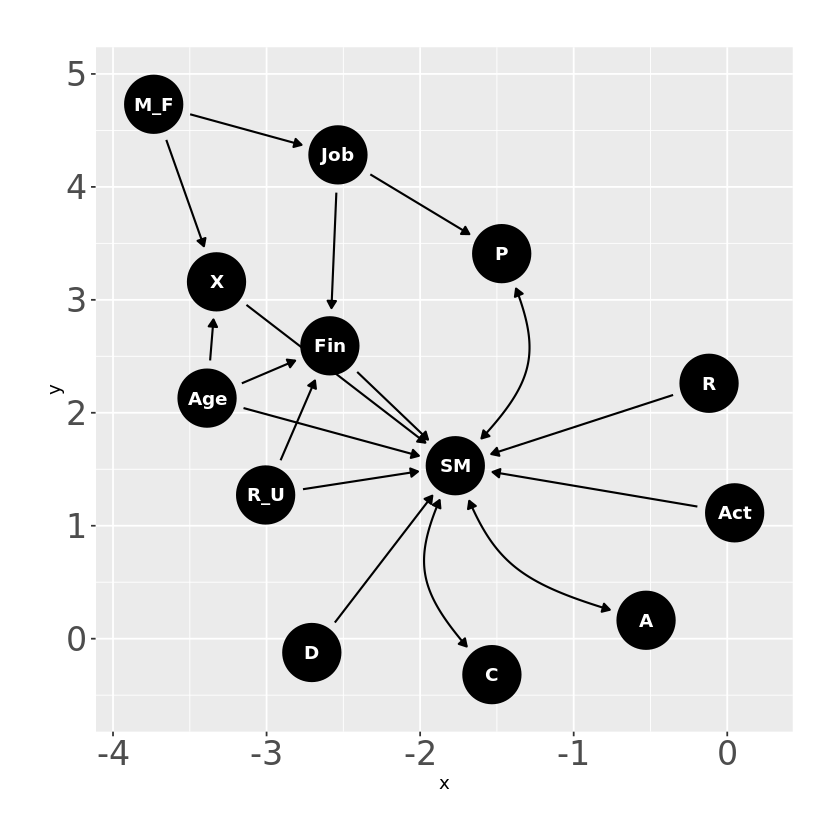

In [5]:
tidy_ggdag %>%
  ggdag() +
  theme(
    plot.margin = unit(c(1, 1, 1, 1), "cm"),
    axis.text = element_text(size = 20)      # Adjust text size
  )

### References:

Alblwi, A., McAlaney, J., Al Thani, D.A.S. et al. Procrastination on social media: predictors of types, triggers and acceptance of countermeasures. Soc. Netw. Anal. Min. 11, 19 (2021). https://doi.org/10.1007/s13278-021-00727-1

Amanda Baughan, Mingrui Ray Zhang, Raveena Rao, Kai Lukoff, Anastasia Schaadhardt, Lisa D. Butler, and Alexis Hiniker. 2022. “I Don’t Even Remember What I Read”: How Design Influences Dissociation on Social Media. In Proceedings of the 2022 CHI Conference on Human Factors in Computing Systems (CHI '22). Association for Computing Machinery, New York, NY, USA, Article 18, 1–13. https://doi.org/10.1145/3491102.3501899

Arguedas, A., Robertson, C. T., Fletcher, R., & Nielsen, R. K. (2022, January 19). Echo chambers, filter bubbles, and polarisation: a literature review. Reuters Institute for the Study of Journalism. https://reutersinstitute.politics.ox.ac.uk/echo-chambers-filter-bubbles-and-polarisation-literature-review#header--8

Baerg MacDonald, K., Benson, A., Sakaluk, J. K., & Schermer, J. A. (2023). Pre-Occupation: A Meta-Analysis and Meta-Regression of Gender Differences in Adolescent Vocational Interests. Journal of Career Assessment, 31(4), 715-738. https://doi.org/10.1177/10690727221148717

Copeland, C. (2022, March 3). Understanding the Finances of Rural vs. Urban Americans. Employee Benefit Research Institute. https://www.ebri.org/content/understanding-the-finances-of-rural-vs.-urban-americans

Cunningham, S., Hudson, C.C. & Harkness, K. Social Media and Depression Symptoms: a Meta-Analysis. Res Child Adolesc Psychopathol 49, 241–253 (2021). https://doi-org.libproxy.berkeley.edu/10.1007/s10802-020-00715-7

González-Bueso V, Santamaría JJ, Fernández D, Merino L, Montero E, Ribas J. Association between Internet Gaming Disorder or Pathological Video-Game Use and Comorbid Psychopathology: A Comprehensive Review. Int J Environ Res Public Health. 2018 Apr 3;15(4):668. doi: 10.3390/ijerph15040668. PMID: 29614059; PMCID: PMC5923710.

Hale, T. M., Cotten, S. R., Drentea, P., & Goldner, M. (2010). Rural-Urban Differences in General and Health-Related Internet Use. American Behavioral Scientist, 53(9), 1304-1325. https://doi.org/10.1177/0002764210361685

Hruska, J., & Maresova, P. (2020). Use of Social Media Platforms among Adults in the United States—Behavior on Social Media. Societies, 10(1), 27. https://doi.org/10.3390/soc10010027 

Li, S., Ren, P., Chiu, M. M., Wang, C., & Lei, H. (2021). The Relationship Between Self-Control and Internet Addiction Among Students: A Meta-Analysis. Frontiers in Psychology, 12. https://doi.org/10.3389/fpsyg.2021.735755

McCabe, S.D., Ferrari, D., Green, J. et al. Post-January 6th deplatforming reduced the reach of misinformation on Twitter. Nature 630, 132–140 (2024). https://doi.org/10.1038/s41586-024-07524-8

Moon, Y. E., & Lewis, S. C. (2024). Social Media as Commodifier or Homogenizer? Journalists’ Social Media Use in Individualistic and Collectivist Cultures and Its Implications for Epistemologies of News Production. Digital Journalism, 1–20. https://doi.org/10.1080/21670811.2024.2303988

Patti Valkenburg, Ine Beyens, J Loes Pouwels, Irene I van Driel, Loes Keijsers, Social Media Use and Adolescents’ Self-Esteem: Heading for a Person-Specific Media Effects Paradigm, Journal of Communication, Volume 71, Issue 1, February 2021, Pages 56–78, https://doi.org/10.1093/joc/jqaa039

Peng, P., Liao, Y. Six addiction components of problematic social media use in relation to depression, anxiety, and stress symptoms: a latent profile analysis and network analysis. BMC Psychiatry 23, 321 (2023). https://doi.org/10.1186/s12888-023-04837-2

Purba A K, Thomson R M, Henery P M, Pearce A, Henderson M, Katikireddi S V et al. Social media use and health risk behaviours in young people: systematic review and meta-analysis BMJ 2023; 383 :e073552 doi:10.1136/bmj-2022-073552 

Social Media and News Fact Sheet. (2024, September 17). Pew Research Center. https://www.pewresearch.org/journalism/fact-sheet/social-media-and-news-fact-sheet/

Social Media Users by Country 2024. (n.d.). World Population by Country 2024 (Live). https://worldpopulationreview.com/country-rankings/social-media-users-by-country

Vaid, S. S., & Harari, G. M. (2020). Who Uses What and How Often?: Personality Predictors of Multiplatform Social Media Use Among Young Adults. Journal of Research in Personality, 104005. https://doi.org/10.1016/j.jrp.2020.104005

Walkley, S. (2023, March). The Carbon Cost of Social Media - The Carbon Literacy Project. The Carbon Literacy Project. https://carbonliteracy.com/the-carbon-cost-of-social-media/ 